## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the dataset

In [5]:
data = pd.read_excel('/content/advertising_sales_data.xlsx')

In [4]:
data.head()

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


In [6]:
data.shape

(200, 5)

In [7]:
## Check for missing values
data.isnull().sum()

,0
Campaign,0
TV,0
Radio,2
Newspaper,0
Sales,0


In [8]:
data[data['Radio'].isnull()==True]

,Campaign,TV,Radio,Newspaper,Sales
19,camp20,147.3,NaN,19.1,14.6
152,camp153,197.6,NaN,14.2,16.6


In [9]:
# Since there are only two NaN values, we can drop it.
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

,0
Campaign,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   198 non-null    object 
 1   TV         198 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  198 non-null    float64
 4   Sales      198 non-null    float64
dtypes: float64(4), object(1)
memory usage: 9.3+ KB


## 1.	What is the average amount spent on TV advertising in the dataset?

In [12]:
data['TV']

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [13]:
# Avg amount spent on TV advertising
data['TV'].mean()

146.78585858585862

## 2.	What is the correlation between radio advertising expenditure and product sales?

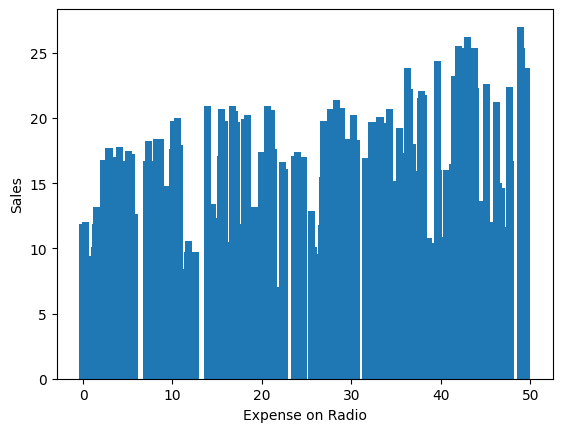

In [14]:
plt.bar(data['Radio'], data['Sales'])
plt.xlabel('Expense on Radio')
plt.ylabel('Sales')
plt.show()

In [15]:
data['Radio'].corr(data['Sales'])

0.3497277129207837

In [16]:
## Expenditure on Radio and sales is positively correlated.

## 3.	Which advertising medium has the highest impact on sales based on the dataset?

In [17]:
data.head(2)

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4


In [18]:
df = data[['TV','Radio','Newspaper','Sales']]

In [19]:
correlation_matrix = df.corr()
print(correlation_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054848   0.059075  0.901372
Radio      0.054848  1.000000   0.354987  0.349728
Newspaper  0.059075  0.354987   1.000000  0.159125
Sales      0.901372  0.349728   0.159125  1.000000


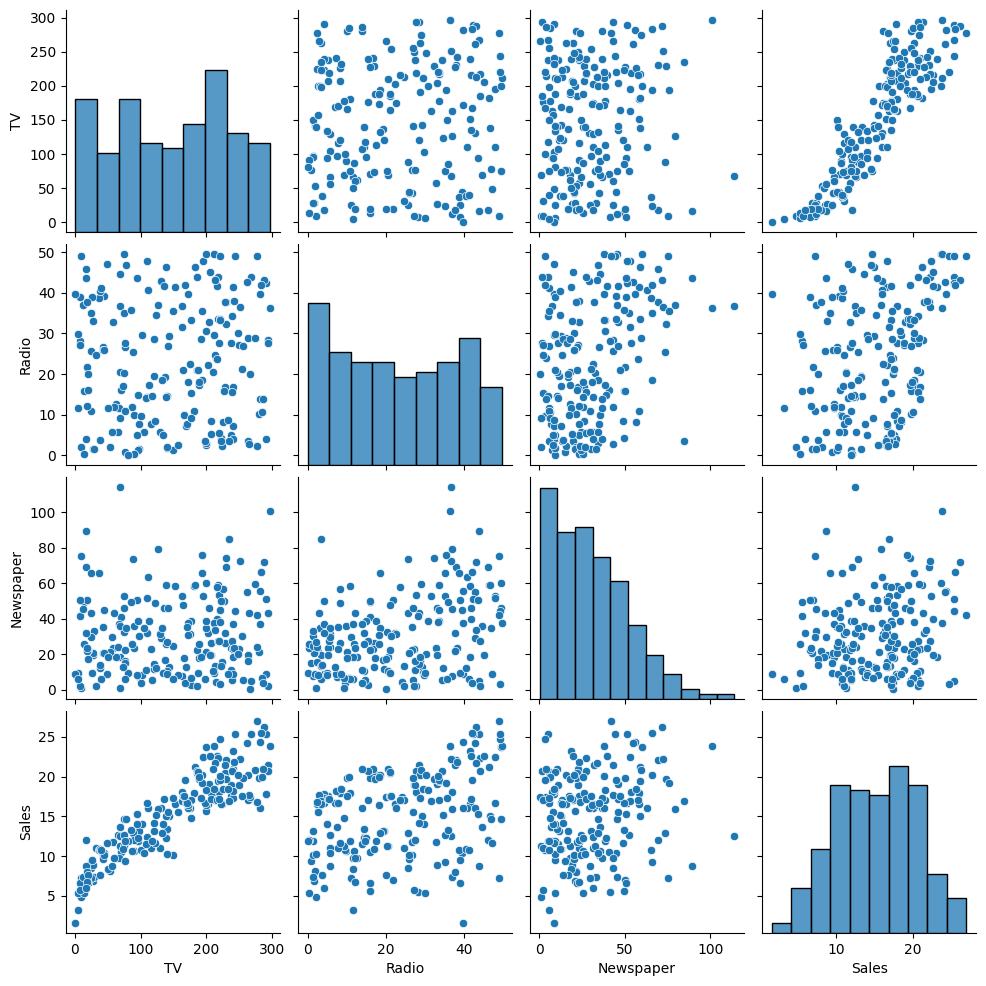

In [20]:
sns.pairplot(df)
plt.show()

In [21]:
## It's clear from the above data that Expenditure on TV has highest impact on Sales.

## 4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [23]:
df.head(1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1


In [24]:
# Define the independent variables
X = df[['TV', 'Radio', 'Newspaper']]


In [25]:
# Define the dependent variable
y = df['Sales']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict the sales values using the trained model
y_pred = model.predict(X_test)

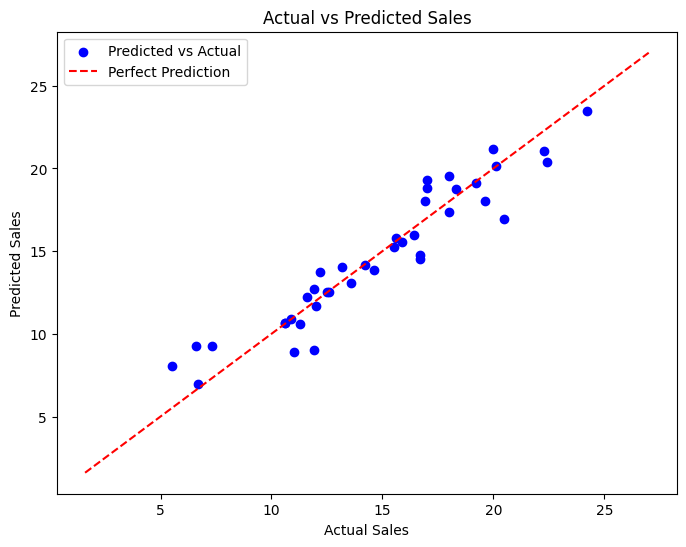

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
# Add a line for perfect predictions (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

## 5.	How would sales be predicted for a new set of advertising expenditures: 200 on TV, 40 on Radio, and 50 on Newspaper?

In [31]:
new_data = np.array([[200, 40, 50]])

In [32]:
predicted_sales = model.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
predicted_sales

array([19.8195841])

In [34]:
print(f"Predicted Sales for TV=$200, Radio=$40, Newspaper=$50: ${predicted_sales[0]:.2f}")

Predicted Sales for TV=$200, Radio=$40, Newspaper=$50: $19.82


## 6.	How does the performance of the linear regression model change when the dataset is normalized?

When the dataset is normalized, the performance of the linear regression model can improve in the following ways:

1.Faster Convergence (if using gradient descent): Normalization helps gradient-based optimization algorithms converge faster by ensuring all features contribute equally to the model, reducing issues with uneven scaling.

2.Improved Stability: Normalization reduces the risk of numerical instability, especially when features have vastly different magnitudes, ensuring more reliable coefficient estimates.

3.Better Comparison of Feature Importance: After normalization, all features are on the same scale, making it easier to interpret the relative importance of each feature in predicting the target variable (Sales).

## 7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?

In [35]:
X = df[['Radio', 'Newspaper']]


In [36]:
y = df['Sales']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model_new = LinearRegression()
model_new.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model_new.predict(X_test)

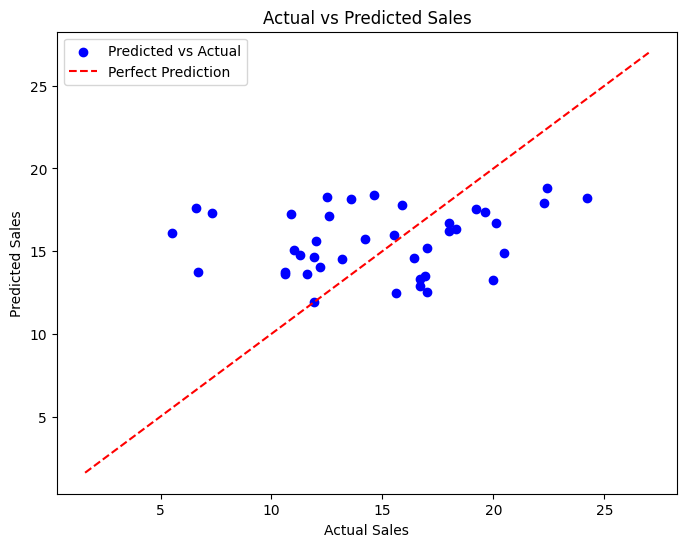

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
# Add a line for perfect predictions (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

In [42]:
## Here, actual vs predicted is non-linear and far from perfect prediction. Therefore model is not accurate and will not predict accurately.